# DSCI 100 Project Report - Classifying Rocks and Mines

## Introduction

### Background

The goal of our project is to understand the difference between man made pollutants and compare and contrast it with sonar data that would be obtained from rocks. More specifically, we will look at the difference from sonar data frequencies from mines alternatively known as mines versus rocks. 
The objects located on the sea floor or buried under the sand are difficult to detect because their appearance,envirnment and shape. Hence, these challenges can be addresed with an accurate classification model and more can be understood about the objects that within our oceans - simply by relying on sonar data. Thereby, reducing the number of false idetifiations when exploring the seabeds. Below we have 208 instances that were obtained by bouncing sonar signals off objects under water in certain conditions and at various angles. Each observation is between 0.0 to 1.0 and represents the energy within a particular frequency band, over a given time period of X1 to X60.

### Guiding Question

Given 60 different energy levels from different frequency band's obtained from a sonar system, can one determine whether an underwater object is a rock or a mine? 

### Dataset

We will train the model using the Connectionist Bench (Sonar, Mines vs. Rocks) Data Set from the University of California Irvine. The data contains 111 patterns sonar information from mines and 97 patterns from rocks (with each observation taken at a different angle). This will allow us to write a classification algorithm differentiating between the two objects. 

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

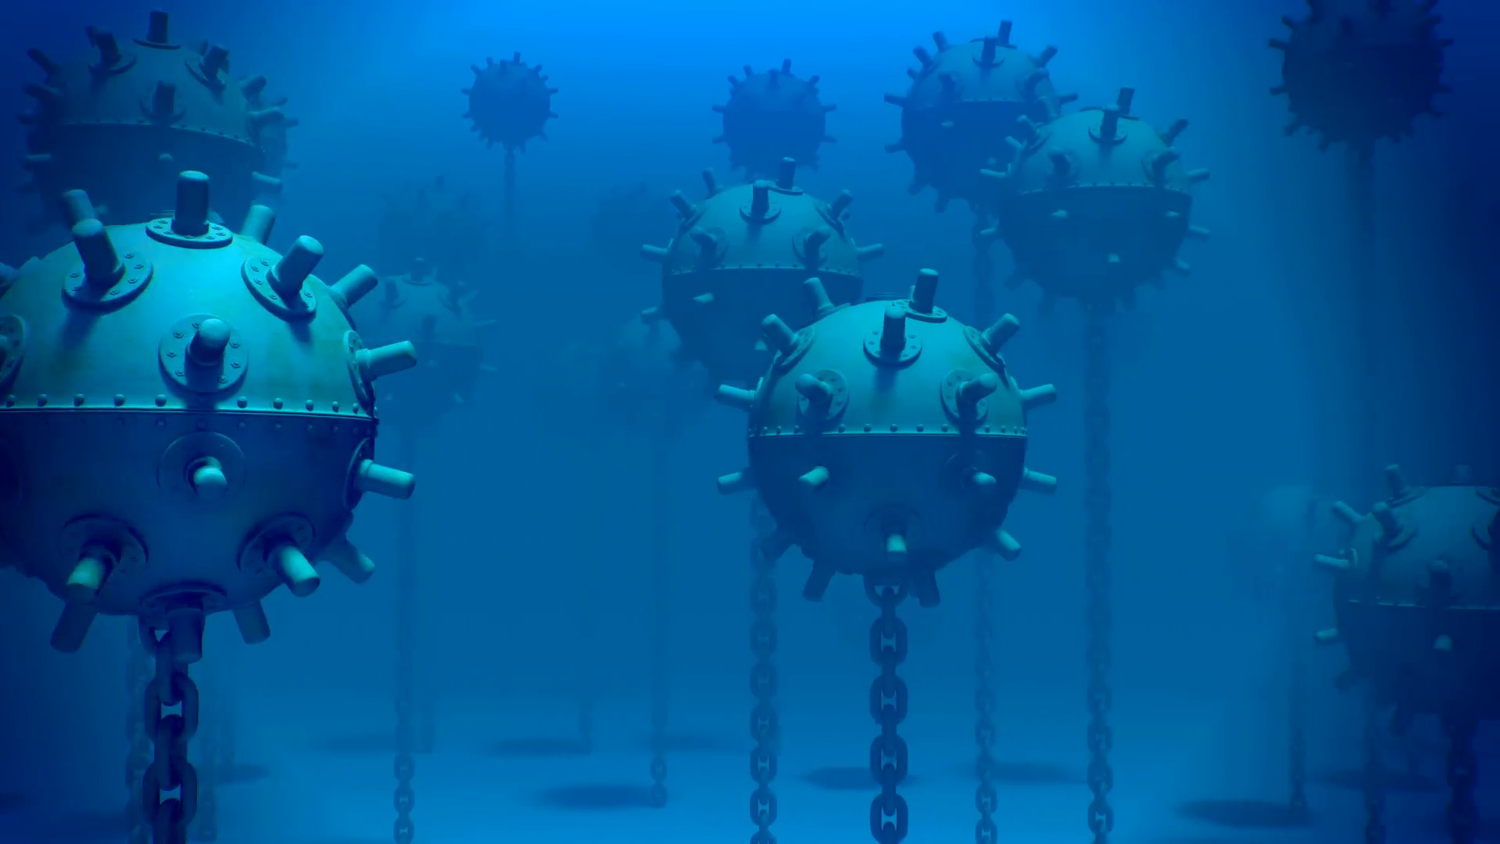
Image taken from: https://thestrategybridge.org/the-bridge/2018/8/8/sea-mines-in-amphibious-operations 


## Preliminary exploratory data analysis 

### Loading libraries

To process the data and preform classification, we will be using the `tidyverse`, `repr`, `tidymodels`, and `GGally` packages. 

We will also use `cowplot` to center plots beside one another. 

In [59]:
library(tidyverse)
library(repr)
library(cowplot)
library(GGally)
library(tidymodels)

### Reading the data

We will read the data directly from the UCI Machine Learning Repository (link https://archive.ics.uci.edu/ml/index.php). 

The last 10 rows will be outputted as a preview showing the current state of the data collected.

It is worthwhile to note that there are 60 columns, each denoting the energy within a frequency band over a period of time. And, each value is a number between 0 and 1 (representing energy in a frequency band). 

In [60]:
sonar_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE)

tail(sonar_data, 10) # only last 10 rows will be outputted as a preview (dataset is very large if we preview more)

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,⋯,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060,M
0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,⋯,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
0.0131,0.0387,0.0329,0.0078,0.0721,0.1341,0.1626,0.1902,0.2610,0.3193,⋯,0.0150,0.0076,0.0032,0.0037,0.0071,0.0040,0.0009,0.0015,0.0085,M
0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,⋯,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031,M
0.0272,0.0378,0.0488,0.0848,0.1127,0.1103,0.1349,0.2337,0.3113,0.3997,⋯,0.0091,0.0045,0.0043,0.0043,0.0098,0.0054,0.0051,0.0065,0.0103,M
0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,⋯,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,⋯,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,⋯,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,⋯,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### Tidying the data

We also preprocess the data to move the column that we are classifying by (categories) to the first column rather than the end to make it more clear which each row represents.

In [61]:
set.seed(2000)
numeric_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    select(-X61)

categories <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", col_names=FALSE) %>%
    pull(X61)

sonar_data <- tibble(categories, numeric_data) %>%
    mutate(categories = as_factor(categories))
max(sonar_data$X21)
head(sonar_data, 10) # preview the first 10 rows

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  X61 = col_character()
)

See spec(...) for full column specifications.



[1] 1

categories,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
R,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,⋯,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
R,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,⋯,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
R,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,⋯,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
R,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,⋯,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
R,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,⋯,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
R,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,⋯,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
R,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,⋯,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
R,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,⋯,0.0052,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053
R,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,⋯,0.0061,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022


### Splitting into training and testing data

Split 75% of the data to be training data and the remaining 25% as testing data. 

In [62]:
sonar_split <- initial_split(sonar_data, prop = 0.75, strata = categories)  
training_data <- training(sonar_split)   
testing_data <- testing(sonar_split)

tail(training_data, 3) # training data preview

categories,X1,X2,X3,X4,X5,X6,X7,X8,X9,⋯,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,⋯,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
M,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,⋯,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048
M,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,⋯,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115


### Experimenting with preprocessing
In our proposal, we found the mean of each energy value from each frequency band in the training data as an indicator to classify by.

Additionally, we figured that to distill the classification into two variables that can be plotted, we can find the mean from the first range of sonar data (from X1-X30) labelled as mean1 and the range from (X31-X60), labelled mean2. This can give us two variables that can be compared against each other (and factors each column) when creating the classification algorithm.

However, since the proposal we have removed the mean of X1-X30 and X31-X60. The reason being that during our expirementation and testing of training the model, it yielded lower results and was not an accurate predictor. The mean considers the sum of data, which provides us with a general summary of the data. However, if we use mean as the predictor, it may not give us a good prediction at some points, thus leading to low accuracy. For example, some frequencies have an energy of about 0.0023, but some frequencies have an energy of about 0.93. If we calculate the average value, it will give us the middle value of these data without considering the extreme data. Therefore, in this case, considering the low accuracy we got when using the average, it means that it is not a very good predictor.

### Summarizing the data

By giving a summary of the data, we hope to give the reader an understanding of the dataset we are using by reporting a snapshot of information like the number of observations we are training with. 

As shown, we have 73 observations of sonar data for rocks and 84 observations of measurements for mines for training. 

In [63]:
summary <- training_data %>% 
    group_by(categories) %>% 
    summarize(n = n())

summary

`summarise()` ungrouping output (override with `.groups` argument)



categories,n
<fct>,<int>
R,73
M,84


### Plot

**RYAN's NOTES: I think this can be shortened a lot if we are high on word count, I just wanted to get the general idea now and we can/should maybe shorten it later**
The Connectionist Bench (Sonar, Mines vs. Rocks) Data Set from the University of California Irvine contains 60 columns along with each representing the energy levels from a frequency band. With these 60 different variables, we need a way to choose the best predictor variables for the model. To do this, we can measure correlation with a comparison graph. Because we cannot compare each of the 60 variables with one another (resulting in 60^2 of possible combinations) **NEED TO CHECK IF THAT IS RIGHT**, we can split into 6 different comparison plots. Each comparison plot will look at a subset of variables. For example, the first plot will be from 1-10, the second from 11-20, the third from 21-30 and so on. 

Because it will be rather large if we include all 6 graphs, we will distill the top 10 predictors with the highest correlation into a single graph. The single graph that we will report will then be used to pick the "best of the best" two predictor variables and correlation. These two variables will then be used to train the model.  

We will include the code to create each of the six comparison plot however, only the final graph with the variables with the highest correlation will be displayed (to not add too many graphs and take away from the overall idea of picking the predictor variables and cause the runtime of the project to increase significantly)

**RYAN'S NOTES: I think we need to explain better why/how we can't compare all the predictor variables together (like X1 and X60 for example with the Correlation graph) I am still confused how we will explain that or if we can try to compare all the variables somehow.**
****

**RYAN'S NOTES: AFTER (or BEFORE) we pick the variables we need to explain why correlation (and what correlation is) is important for classification (to justify the choice of why we picked those variables)**

In [64]:
comparison_plot_first_10 <- sonar_data  %>%
    select(X1:X10) %>%
    ggpairs(aes(color = categories))

comparison_plot_second_10 <- sonar_data  %>%
    select(X11:X20) %>%
    ggpairs(aes(color = categories))

comparison_plot_third_10 <- sonar_data  %>%
    select(X21:X30) %>%
    ggpairs(aes(color = categories))

comparison_plot_fourth_10 <- sonar_data  %>%
    select(X31:X40) %>%
    ggpairs(aes(color = categories))

comparison_plot_fifth_10 <- sonar_data  %>%
    select(X41:X50) %>%
    ggpairs(aes(color = categories))

comparison_plot_sixth_10 <- sonar_data  %>%
    select(X51:X60) %>%
    ggpairs(aes(color = categories))

# Uncomment to display the six graphs where the predictor values with the highest correlation came from
# comparison_plot_first_10
# comparison_plot_second_10
# comparison_plot_third_10
# comparison_plot_fourth_10
# comparison_plot_fifth_10
# comparison_plot_sixth_10

# RYAN's NOTES
# TODO: distill in to the final graph with the values with the highest correlation and comment all the other graphs to only include the main graph. 

By looking at the above graph, we selected the 10 variables with the highest correlations (X9 and X10, X17 and X18, X36 and X37, X26 and X27, X48 and X49). We create a single graph with the variables with the highest correlations.

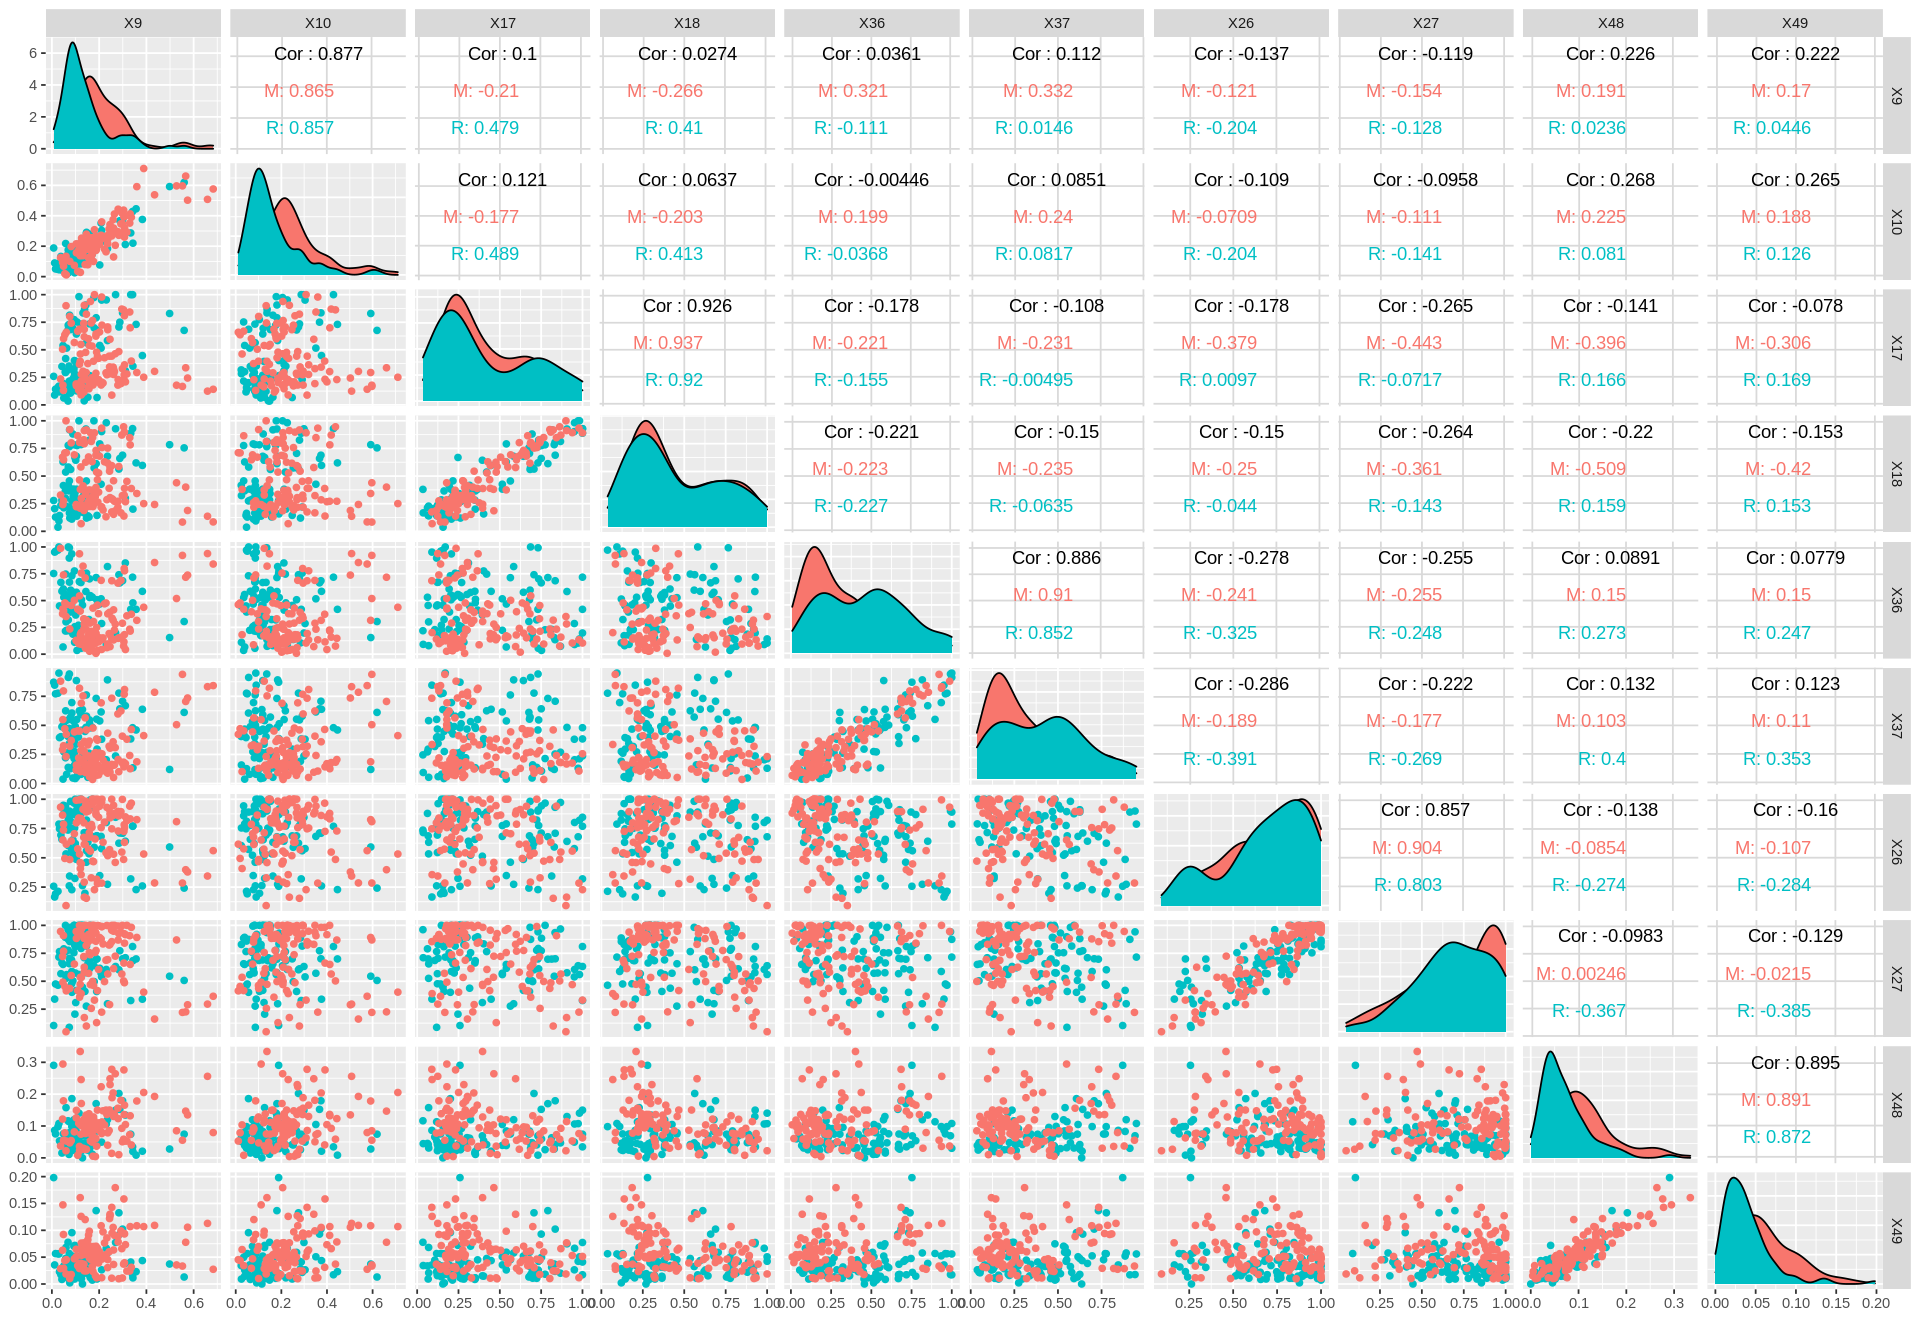

In [65]:
highest_cor_plot <- sonar_data %>%
    select(X9, X10, X17, X18, X36, X37, X26, X27, X48, X49) %>%
    ggpairs(aes(color = categories))
highest_cor_plot

From the above graph, there are some variables with low correlations. We included these low correlations because this allows us to keep our model unbiased. We want our model to account for new data points and not just very specific points that fit the correlation in this dataset (which is why we use more than two predictor variables that range in correlation and don't just pick all 60). 

### Why correlation?

**RYAN's NOTE: TODO, EXPLAIN WHY CORRELATION IS IMPORTANT**

As we have 60 different variables to pick from we had to make a selection of which variables we should use. As one of the weakness of KNN classification is that it may not preform well with a large number of predictors, we did not use all 60 predictors. To select our predictitors we used linear correlation as our feature selection. This is because the high correlated predictors are the most informative. 
Moreover, using the best subset selection method we tried different combinations of prdictors and the ones that produced the best result were the ones that were the most linear. **from chapter 6**

Maybe this would be a helpful source? 
https://datascience.stackexchange.com/questions/63558/should-features-be-correlated-or-uncorrelated-for-classification 

Now, we can take a look at the plot with the predictor variables with the best correlation: 

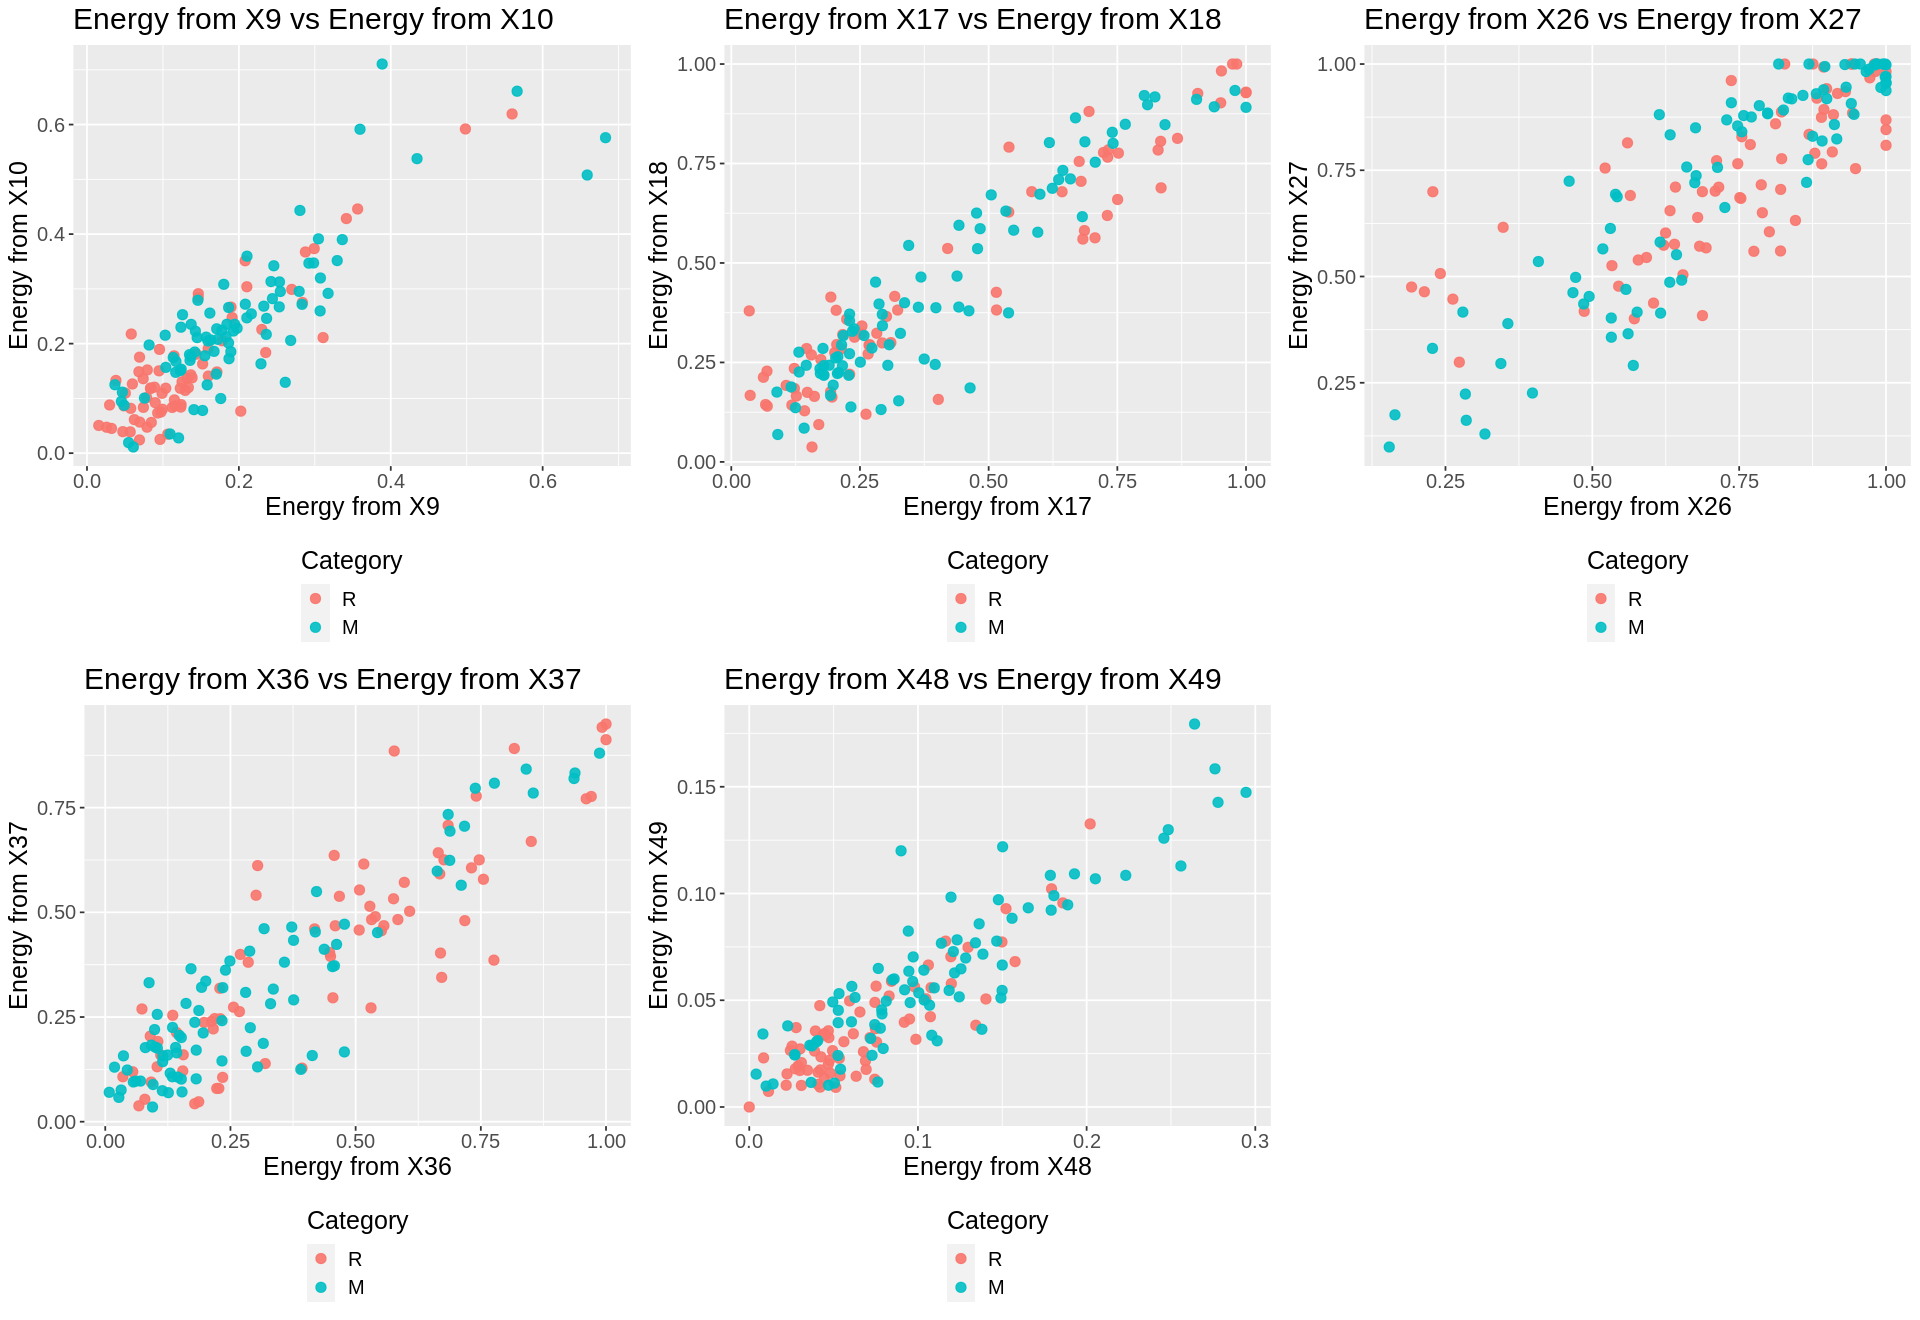

In [66]:
options(repr.plot.width = 16, repr.plot.height = 11)

best_correlation_plot1 <- ggplot(training_data, aes(x = X9, y = X10, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X9",
             y = "Energy from X10",
            colour = "Category") +
        ggtitle("Energy from X9 vs Energy from X10") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot2 <- ggplot(training_data, aes(x = X17, y = X18, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X17",
             y = "Energy from X18",
            colour = "Category") +
        ggtitle("Energy from X17 vs Energy from X18") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot3 <- ggplot(training_data, aes(x = X26, y = X27, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X26",
             y = "Energy from X27",
            colour = "Category") +
        ggtitle("Energy from X26 vs Energy from X27") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot4 <- ggplot(training_data, aes(x = X36, y = X37, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X36",
             y = "Energy from X37",
            colour = "Category") +
        ggtitle("Energy from X36 vs Energy from X37") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")

best_correlation_plot5 <- ggplot(training_data, aes(x = X48, y = X49, colour = categories)) +
    geom_point(alpha = 0.9, size = 2.5) +
        labs(x = "Energy from X48",
             y = "Energy from X49",
            colour = "Category") +
        ggtitle("Energy from X48 vs Energy from X49") +
        theme(text = element_text(size = 15),
             legend.position = "bottom",
             legend.direction = "vertical")
best_correlation_plot <- plot_grid(best_correlation_plot1, best_correlation_plot2, best_correlation_plot3, best_correlation_plot4
         , best_correlation_plot5)
best_correlation_plot

# Methods & Results
To conduct our analysis, we plan to both look at two different columns and classify by those (X1 and X2) and use the mean from the first 30 columns and the mean from the last 30 columns. This will give us two reference points that we can compare to find the most accurate variables to use for classification. Thus, we can identify objects from the energy on a frequency band when sonar apparatus are used. 

We plan to use a K-Nearest Neighbours to preform the classification and tuning to find the optimal number of neighbours that will lead us to the best classification accuracy. The model can then be rewritten with the best neighbour and it can be tested on the `testing_data` to measure accuracy. We will also compare the two models (one being using X1, X2 and the other mean1, mean2) to see which uses better classification variables.

By splitting the data into two same size portions of thirty and finding the mean, we can visualize the data using scatterplots. This will allow us to visually see neighbours that classification methods will use to make future predictions.

**Rewrite the methods and results(modified based on the above):**

To conduct our analysis, we plan to both look at two different columns and classify by those (X1 and X2) and use the mean from the first 30 columns and the mean from the last 30 columns. However, we got low accuracy by using the mean as predictor. Then, we try to compare the correlation between the variables and plot the highest 10 correlation in a single graph. Also, we show the 5 plots which give us the highest correlation between the two variables. 

We plan to use a K-Nearest Neighbours to preform the classification. We using the the 10 variables with the highest correlation as our predictors and tuning to find the optimal number of neighbours that will lead us to the best classification accuracy. To find the best accuracy, we can visualize it by using a scatterplot. The model can then be rewritten with the best neighbour and it can be tested on the `testing_data` to measure accuracy. 

This model will allow us to predict whether an underwater object is a rock or a mine.

## Data Analysis

To preform our data analysis we are going to use K-Nearest Neighbours. However, to find the optimal number of neighbours we will tune the classifier beforehand and graph the resultant accuracies in order to determine which value of $K$ (denoting neighbours) has the highest accuracy. That value of $K$ would be used for the actual model. We will use a vfold value of 10, meaning that the model will test and compare for 10 iterations of $K$ or checking 10 neighbours. **RYAN NEEDS TO EXPLAIN BETTER**

Note that we also will be fitting based on the resamples. This will run the cross-validation on each train/validation split. 

And finally, the data we will be using will be using the range of predictor variables that we deemed to have the highest correlation. More specifically, X9, X10, X17, X18, X26, X27, X36, X37, X48, X49.  

### Creating the Recipe, Vfold, and Workflow

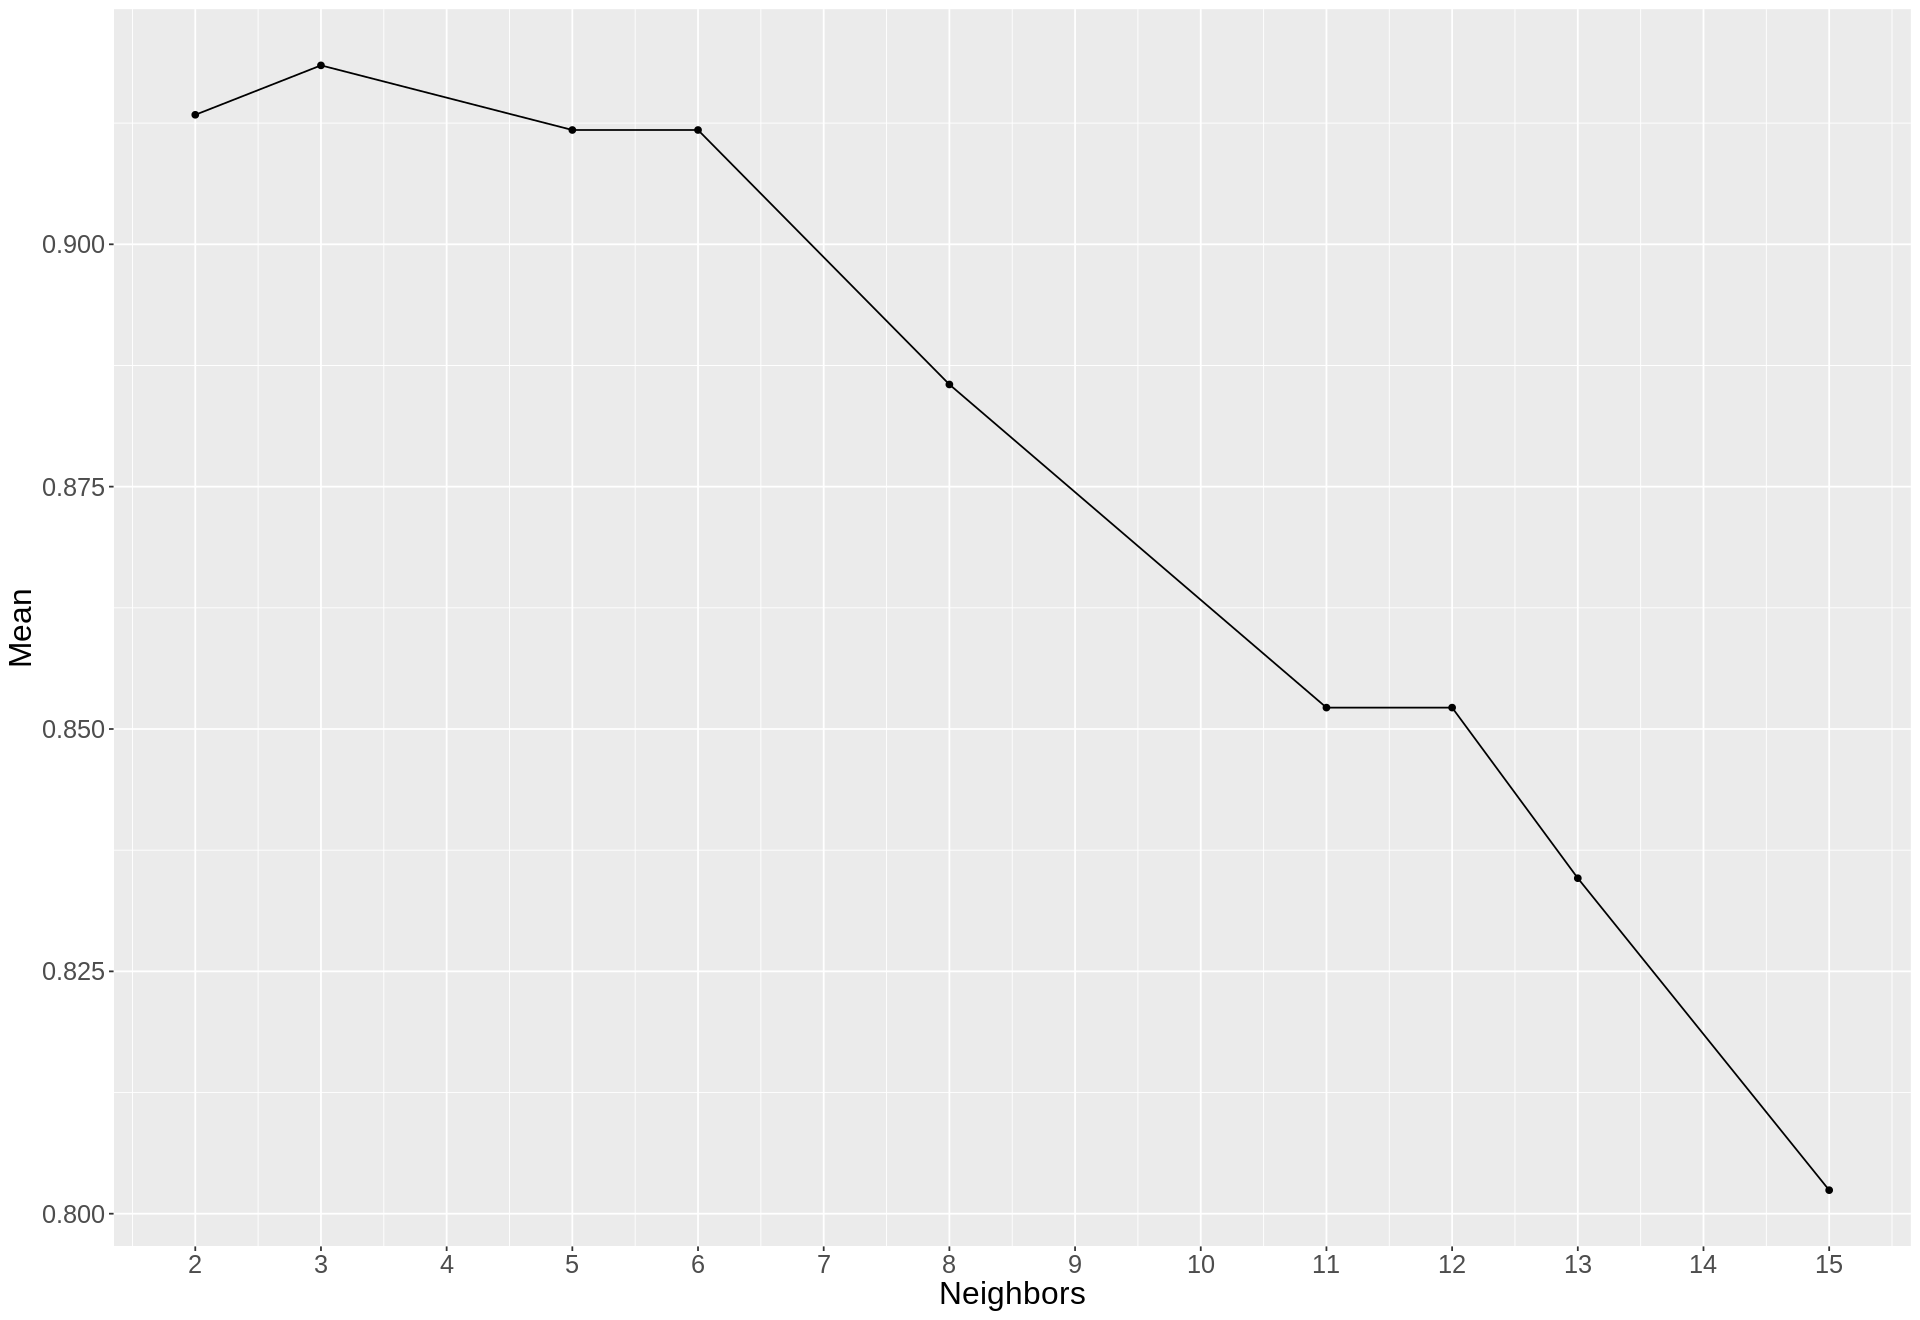

In [67]:
sonar_recipe <- recipe(categories ~ X9 + X10 + X17 + X18 + X26 + X27 + X36 + X37 + X48 + X49, 
                       data = training_data) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

sonar_vfold <- vfold_cv(training_data, v = 10, strata = categories)

sonar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>% 
    set_mode("classification")

sonar_fit <- workflow() %>%
      add_recipe(sonar_recipe) %>%
      add_model(sonar_spec) %>%
      tune_grid(resamples = sonar_vfold, grid = 10) %>%
      collect_metrics()

sonar_filtered_accuracy <- sonar_fit %>% 
    filter(.metric == "accuracy")

tuning_plot <- sonar_filtered_accuracy %>% 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() + 
    geom_line() + 
    scale_x_continuous(breaks = 0:20) +
    labs(x = "Neighbors", y = "Mean") + 
    theme(text = element_text(size = 19))

tuning_plot

As shown from the plot above, a k value of 2 yielded the highest accuracy. So, we will use that value for the model.  

Despite a k value of 1 is reasonably close to the best predictor to use (and at times with different seeds the model predicted 1 to be the highest scoring k value) it is a bad idea to use k = 1. This is because the classifier will essentially match each new observation to its closest neighbour. Not only does this mean that the classifier becomes unreliable when seeing new data, but the model will also be an overfit because it is influenced too heavily by the training data. 

It is noteworthy that a k value at 3 and 4 is also scoring as high as a k value at 3. However, the reason why we picked 2 was because it yielded the highest result when we trained it and tested it. Hence, we kept a k value of 2 as the final value used in the model. 

**Lovisa: I edit some change for this (below), but not sure. When we run the whole project, it appears that the highest is 3, and then 2. Our ta may only see the first run of the graph? Maybe we just need to explain the first run?**

As shown from the plot above, the k value of 2, 3 yielded the highest accuracy. We picked 2 because it yielded the highest result when we trained it and tested it. So, we will use that value for the model.  
### Rewriting the model with our most optimal value for K (K = 2)

In [69]:
sonar_spec_untuned <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) %>% 
    set_engine("kknn") %>%
    set_mode("classification")

sonar_fit_untuned <- workflow() %>%
      add_recipe(sonar_recipe) %>%
      add_model(sonar_spec_untuned) %>%
      fit(data = training_data)

sonar_predictions <- predict(sonar_fit_untuned, testing_data) %>% 
  bind_cols(testing_data)

sonar_metrics <- sonar_predictions %>%
      metrics(truth = categories, estimate = .pred_class) 

sonar_conf_mat <- sonar_predictions %>% 
      conf_mat(truth = categories, estimate = .pred_class)

#sonar_predictions
sonar_metrics
sonar_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8431373
kap,binary,0.6851852


          Truth
Prediction  R  M
         R 20  4
         M  4 23

# Expected Outcomes and Significance *needs to be rewritten based on proposal specifications
From this we expect to be able to use our graphs and analysis to predict the types of objects (metals vs rocks) that are under water using new frequency data points. Essentially, our analysis can be used by scientists and sailors who need to map out their journeys and avoid things like mines or rocks. Moreover, divers who are interested in cleaning the seafloors can benefit from such data as well as fishers who want to locate the best spot for their farms. From an environmental standpoint, our oceans can perhaps get cleaned more if accurate and inexpensive ways to classify objects are discovered. 

### Future and conclusion
Studies state that the current active sonars are inadequate because they require many emissions per potential target, yield high false alarm rates, and suffer from high clutter interference due to the envirnment etc. Perhaps our model will be able to assist in reducing these issues and making it easier to accurately identify whether it is a mine or rock. This model can be used to aid in the cleaning of oceans, and increasing the safety of marine life. 
Additionally it could lead to new questions like what other objects can be classified using sonar data? Could we broaden the model to classify new and different objects? 
Moreover, if sonar technology becomes less expensive in the future, accessibility to these models and technologies can lead to even more discoveries of unwanted materials.

**References** 

Gorman, R. P., and Sejnowski, T. J. (1988). Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets in Neural Networks, Vol. 1, pp. 75-89. https://doi.org/10.1016/0893-6080(88)90023-8

Ismail, B., Mohamed, M. (2015). Semisupervised local fusion approach for mine detection in SONAR data International Journal of Intelligent systems.(20), 11, 1161-1183. https://doi.org/10.1002/int.21739

Pamaja, V., Rajendran, V., Vijayalakshmi, P. (2021). Study on metal mine detection from underwater sonar images using data mining and machine learning techniques. Journal Of Ambient Intelligence And Humanized Computing.(12), 5, 5083-5092. https://doi.org/10.1007/s12652-020-01958-4

### Images